In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [2]:
dataset_path = '/content/drive/MyDrive/datasets/17Flowers/train'

In [3]:
idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [4]:
# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1080, activation='relu'),
    layers.Dense(17, activation='softmax')
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=25)

Epoch 1/25
26/26 [==============================] - 799s 31s/step - loss: 2.6935 - accuracy: 0.1045 - val_loss: 2.2236 - val_accuracy: 0.1929
Epoch 2/25
26/26 [==============================] - 7s 257ms/step - loss: 2.2361 - accuracy: 0.2224 - val_loss: 1.7975 - val_accuracy: 0.3756
Epoch 3/25
26/26 [==============================] - 6s 233ms/step - loss: 1.7479 - accuracy: 0.4119 - val_loss: 1.5408 - val_accuracy: 0.4416
Epoch 4/25
26/26 [==============================] - 6s 230ms/step - loss: 1.4297 - accuracy: 0.4921 - val_loss: 1.3655 - val_accuracy: 0.4924
Epoch 5/25
26/26 [==============================] - 7s 260ms/step - loss: 1.1487 - accuracy: 0.6160 - val_loss: 1.4774 - val_accuracy: 0.5127
Epoch 6/25
26/26 [==============================] - 6s 235ms/step - loss: 0.9024 - accuracy: 0.7011 - val_loss: 1.3025 - val_accuracy: 0.5431
Epoch 7/25
26/26 [==============================] - 7s 258ms/step - loss: 0.6756 - accuracy: 0.7424 - val_loss: 1.5765 - val_accuracy: 0.5381
Epoch 

In [8]:
history_augmented = model.fit(dataset_train_augmented,
                    validation_data=dataset_validation_augmented,
                    epochs=25)

Epoch 1/25
26/26 [==============================] - 18s 705ms/step - loss: 1.2024 - accuracy: 0.6586 - val_loss: 1.3450 - val_accuracy: 0.5330
Epoch 2/25
26/26 [==============================] - 17s 676ms/step - loss: 0.8654 - accuracy: 0.7072 - val_loss: 1.2131 - val_accuracy: 0.6091
Epoch 3/25
26/26 [==============================] - 18s 701ms/step - loss: 0.6618 - accuracy: 0.7861 - val_loss: 0.9949 - val_accuracy: 0.6548
Epoch 4/25
26/26 [==============================] - 17s 673ms/step - loss: 0.5300 - accuracy: 0.8056 - val_loss: 1.2636 - val_accuracy: 0.6294
Epoch 5/25
26/26 [==============================] - 18s 702ms/step - loss: 0.5365 - accuracy: 0.8202 - val_loss: 1.3512 - val_accuracy: 0.6193
Epoch 6/25
26/26 [==============================] - 18s 690ms/step - loss: 0.4306 - accuracy: 0.8493 - val_loss: 1.2360 - val_accuracy: 0.7056
Epoch 7/25
26/26 [==============================] - 17s 660ms/step - loss: 0.4493 - accuracy: 0.8457 - val_loss: 1.0185 - val_accuracy: 0.6802

In [56]:
idg = ImageDataGenerator(
    rescale=1./255
)

dataset_test = idg.flow_from_directory(
    '/content/drive/MyDrive/datasets/17Flowers/test',
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

Found 340 images belonging to 17 classes.


In [10]:
model.evaluate(dataset_test)

11/11 [==============================] - 247s 25s/step - loss: 1.7148 - accuracy: 0.7088


[1.7148360013961792, 0.7088235020637512]

In [11]:
model.save('17flower_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
Y_pred = []
Y_test = []

for i in range(11):
  for label in model.predict(dataset_test[i][0]):
    Y_pred.append(np.argmax(label))
  for label in dataset_test[i][1]:
    Y_test.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_test = np.array(Y_test)

1/1 [==============================] - 0s 26ms/step


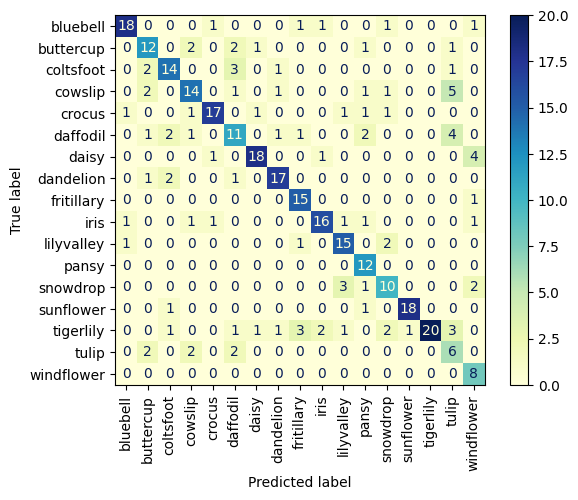

In [104]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=dataset_test.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()